# Task 1 - Data Analysis and Preprocessing

### Load and Explore the data
- Import liberaries
- Load datasets
- Understand the feature `Fraud_data`, `ipaddress_to_country` and `creditcard`

In [1]:
# Directory Setup and Warning Suppression in Python Script
import os
import sys
import pandas as pd 
import socket
import struct

current_dir = os.getcwd()
# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Import data preprocessing and visualization classes for use in the project.
from scripts.data_preprocessing import DataPreprocessor
from scripts.visulaization import DataVisualizer

##### File Paths for Datasets
This section defines the file paths for various datasets used in the project.

In [3]:
# Define file paths for various datasets used in the project.
fraud_file_path = "../data/Fraud_Data.csv"
ipaddress_file_path = "../data/IpAddress_to_Country.csv"
creditcard_file_path = "../data/creditcard.csv"

### Initialize the DataPreprocessor

In [4]:
# Initialize the DataPreprocessor with specified file paths for datasets.
processor = DataPreprocessor(fraud_file_path, ipaddress_file_path, creditcard_file_path)

#### Load datasets

In [5]:
# Load datasets using the DataPreprocessor instance.
fraud_data, ipaddress_data, creditcard_data = processor.load_data()

2025-02-06 23:55:02,205 - INFO - Data loaded successfully!


In [6]:
# Perform exploratory data analysis on the loaded datasets.
processor.explore_data()

2025-02-06 23:55:02,214 - INFO - Exploring data:
2025-02-06 23:55:02,227 - INFO - 
   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  


### 1. Handle Missing Values

In [7]:
# Check for missing values in the fraud data DataFrame.
missing_values = processor.check_missing_values(fraud_data)

2025-02-06 23:55:02,268 - INFO - Missing values: 
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


### 2. Data Cleaning
#### Check duplicate

In [8]:
# Count the number of duplicate entries in the fraud data DataFrame.
duplicate_count = fraud_data.duplicated().sum()
duplicate_count

np.int64(0)

In [ ]:
# Check duplicates for ipaddress
ipaddress_data.duplicated().sum()

np.int64(0)

#### Convert Time Columns to Datetime
This code converts the `signup_time` and `purchase_time` columns in the `fraud_data` DataFrame to datetime format, using `pd.to_datetime`. Any conversion errors will result in `NaT` (Not a Time) values.

In [10]:
# Convert 'signup_time' and 'purchase_time' columns to datetime format.
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'], errors='coerce')
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'], errors='coerce')

### 3. Exploratory Data Analysis (EDA)

Initialize Data Visualizer

In [11]:
# Initialize the DataVisualizer with the fraud data DataFrame.
visualizer = DataVisualizer(fraud_data)

### Univariant Analysis
##### Plot Histograms of Numerical Features

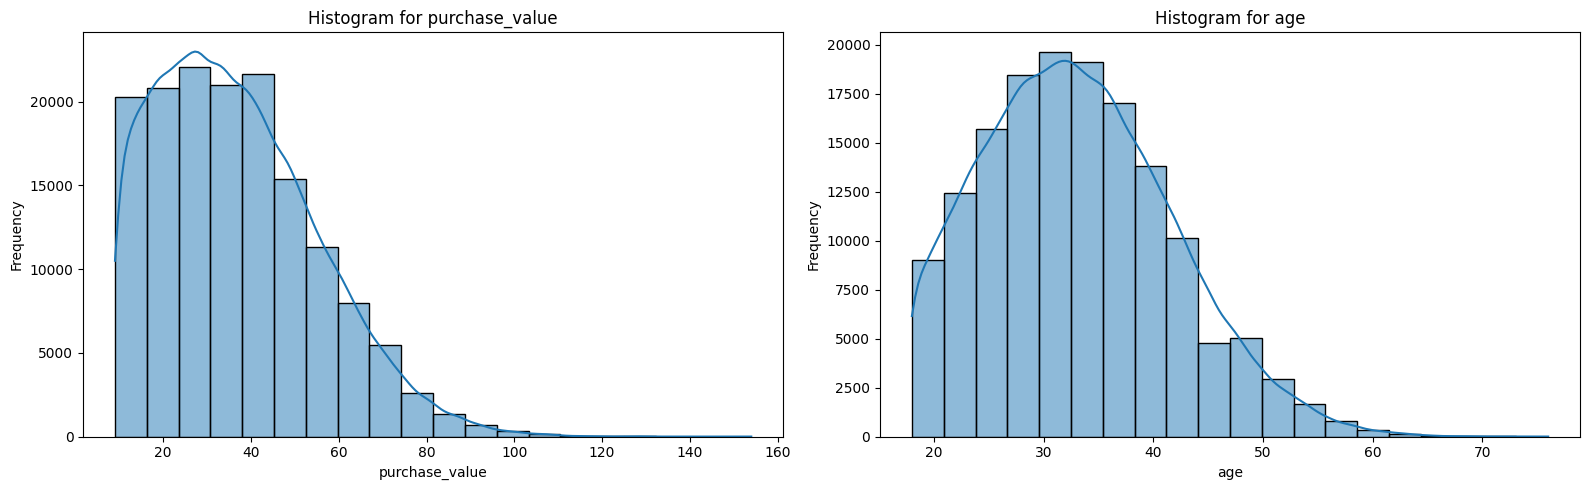

2025-02-06 23:55:03,213 - INFO - Histograms plotted successfully!


In [12]:
# Define numerical features to visualize.
numerical_features = ['purchase_value', 'age']

# Plot histograms for the specified numerical features.
visualizer.plot_histogram(numerical_features)

#### Purchase Value Histogram:
- **Shape**: Right-skewed distribution.
- **Peak**: Most frequent purchase values are around 20-40.

**Insight**: Higher purchase values are less common, indicating potential focus on lower-value transactions.
#### Age Histogram:
- **Shape**: Right-skewed distribution.
- **Peak**: Most frequent ages are in the 20-30 range.

**Insight**: Younger age groups are more active, which could influence marketing strategies.

##### Plot Bar Charts of Categorical Features

2025-02-06 23:55:03,353 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-06 23:55:03,356 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


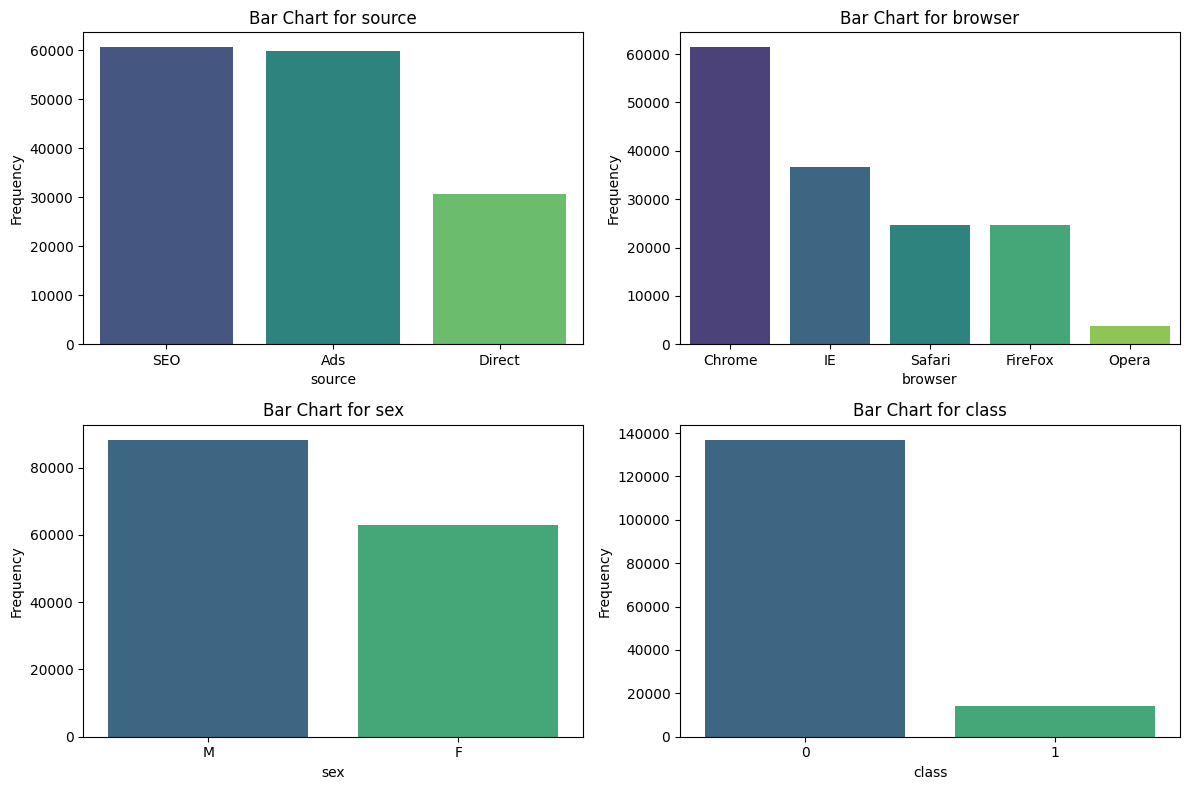

2025-02-06 23:55:03,518 - INFO - Bar charts plotted successfully!


In [13]:
# Define categorical features to visualize.
categorical_features = ['source', 'browser', 'sex', 'class']

# Plot bar charts for the specified categorical features.
visualizer.plot_bar_chart(categorical_features)

### Key insights
##### Source:
- **SEO and Ads**: Most common sources, with similar frequencies.
- **Direct**: Less frequent, suggesting lower direct engagement.
##### Browser:
- **Chrome**: Most popular browser by a large margin.
- **IE, Safari, and Firefox**: Moderate usage.
- **Opera**: Least used.
##### Sex:
- **Males (M)**: Higher frequency than females (F).
##### Class:
- **Class 0**: Dominates the dataset.
- **Class 1**: Significantly less frequent, indicating a minority category.

**Insight**: **SEO** and **Ads** drive most traffic; **Chrome** is the preferred browser.  **Males** are the majority users, and **Class 0** is predominant.